## 목차
**SK 유동인구 데이터**
* [나이와 성별 평균 유동인구 수(by 동)](#나이와-성별-평균-유동인구-수(by-동))
    * [대구](#대구-동에-대한-그래프)
    * [서울](#서울-동에-대한-그래프)
* [나이와 성별 평균 유동인구 수(by 구)](#나이와-성별-평균-유동인구-수(by-구))
    * [서울,대구](#서울,-대구-그래프)
    
**SH 카드매출 데이터**
* [2019년,2020년 매출액(by 전체)](#2019년,-2020년-매출액(전체))
* [2019년,2020년 매출액(by 시)](#2019년,-2020년-매출액(by-시))
    * [전체(서울/대구 비교)](#전체-지역-2019년도-2020년도-매출액(서울/대구-비교))
    * [서울](#서울-2019년도-2020년도-매출액)
    * [대구](#대구-2019년도-2020년도-매출액)
* [2019년,2020년 매출액(by 구)](#2019년,-2020년-매출액(by-구))
    * [전체(중구, 노원구, 중구, 수성구)](#서울/대구-지역-2019년도-2020년도-매출액(중구,-노원구,-중구,-수성구))
    * [서울(중구, 노원구)](#서울-지역-2019년도-2020년도-매출액(중구,-노원구))
    * [대구(중구, 수성구)](#대구-지역-2019년도-2020년도-매출액(중구,-수성구))
    
**COVID 확진자 데이터**
* [일일확진자 수(전일대비 증감수)](#일일확진자-수(전일대비-증감-수))
    * [서울](#서울지역-코로나-일일-확진자-수(전일대비-증감-수))
    * [대구](#대구지역-코로나-일일-확진자-수(전일대비-증감-수))

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt

In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
import pickle

with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/WS_DATA.bin', 'rb') as f:
    ws_data = pickle.load(f) 
with open('c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2/COVID_DATA.bin', 'rb') as f:
    covid_data = pickle.load(f) 

In [8]:
print(cj_data.keys())
print(gs_data.keys())
print(sk_data.keys())
print(sh_data.keys())
print(ws_data.keys())
print(covid_data.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['SK_AGE', 'SK_TIME', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])
dict_keys(['covid_0307', 'COLUMN_INFO'])


In [9]:
# cj 데이터
cj = cj_data['CJ_DATA']
# gs 데이터 
gs_total = gs_data['GS_TOTAL']
gs_category = gs_data['GS_CATEGORY']
gs_dong = gs_data['GS_DONG']
# sk 데이터
sk_age = sk_data['SK_AGE']
sk_time = sk_data['SK_TIME']
# sh 데이터
sh_resident = sh_data['SH_RESIDENT']
sh_foreign = sh_data['SH_FOREIGN']
# ws 데이터
ws_mention = ws_data['WS_MENTION']
ws_sentiment = ws_data['WS_SENTIMENT']
ws_topic = ws_data['WS_TOPIC']
# covid 데이터
covid = covid_data['covid_0307']

## 나이와 성별 평균 유동인구 수(by 구)

In [10]:
age_col_list = sk_age.columns.values.tolist()
age_col_list = age_col_list[7:22]

temp_df = pd.DataFrame(np.round(sk_age.groupby(['GU_CODE','SEX'])[age_col_list].mean(), 2).to_records())
# temp_df

In [11]:
# gu_code 딕셔너리를 DataFrame로 변환
gu_df = pd.DataFrame(sk_data['GEO_CODE_DICT']['DICT_GU'].items(), columns=['GU_CODE', 'GU_NM'])
# gu_df.head()

In [12]:
# temp_df DataFrame와 gu_code DataFrame 병합
seoul_daegu_df = pd.merge(temp_df, gu_df, on="GU_CODE")
# seoul_daegu_df

###  서울, 대구 그래프

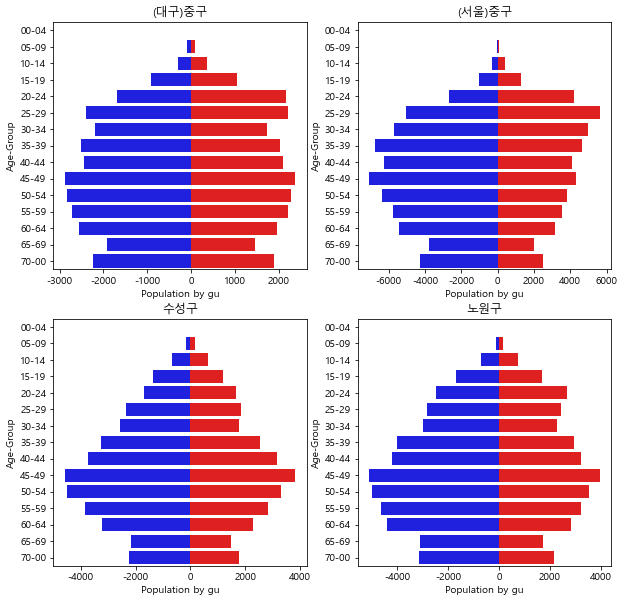

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (10,10))
name_list = seoul_daegu_df['GU_NM'].unique()

for i, ax in zip(range(4),axes.flatten()):
    
    name = name_list[i]

    seoul_daegu_male = -1* (seoul_daegu_df.query("(SEX == 'M') and (GU_NM == @name)")[age_col_list].iloc[0])
    seoul_daegu_female = seoul_daegu_df.query("(SEX == 'F') and (GU_NM == @name)")[age_col_list].iloc[0]
    labels = ['male', 'female']
    seoul_daegu_popl = pd.DataFrame({'age': age_col_list,
                            'male' : seoul_daegu_male,
                            'female' : seoul_daegu_female})
    
    seoul_daegu_gu_plot = sns.barplot(x="male", y="age", data=seoul_daegu_popl, orient='h', color = 'b', lw=0, ax=ax)
    seoul_daegu_gu_plot = sns.barplot(x="female", y="age", data=seoul_daegu_popl, orient='h', color = 'r', lw=0, ax=ax)
    seoul_daegu_gu_plot.set(xlabel="Population by gu", ylabel="Age-Group", title=name)
    
plt.show()    

## 나이와 성별 평균 유동인구 수(by 동)

In [14]:
# 각동에 대해 성별과 나이별 유동인구수 평균 구하기

age_col_list = sk_age.columns.values.tolist()
age_col_list = age_col_list[7:22]

temp_df = pd.DataFrame(np.round(sk_age.groupby(['TOTAL_CODE','SEX'])[age_col_list].mean(), 2).to_records())
# temp_df.head(6)

In [15]:
# 서울 DataFrame로, 대구 DataFrame로 나누기
temp_df['TOTAL_CODE'] = temp_df['TOTAL_CODE'].astype(str)
daegu_df = temp_df[temp_df['TOTAL_CODE'].str.startswith('27')]
seoul_df = temp_df[temp_df['TOTAL_CODE'].str.startswith('11')]

In [16]:
# total_code 딕셔너리를 DataFrame로 변환
total_df = pd.DataFrame(sk_data['GEO_CODE_DICT']['DICT_TOTAL'].items(), columns=['TOTAL_CODE', 'TOTAL_NM'])
# total_df.head()

In [17]:
# 대구 DataFrame와 total_code DataFrame 병합
daegu_df = pd.merge(daegu_df, total_df, on="TOTAL_CODE")
# daegu_df.head()

In [18]:
# 서울 DataFrame와 total_code DataFrame 병합
seoul_df = pd.merge(seoul_df, total_df, on="TOTAL_CODE")
# seoul_df.head()

### 대구 동에 대한 그래프

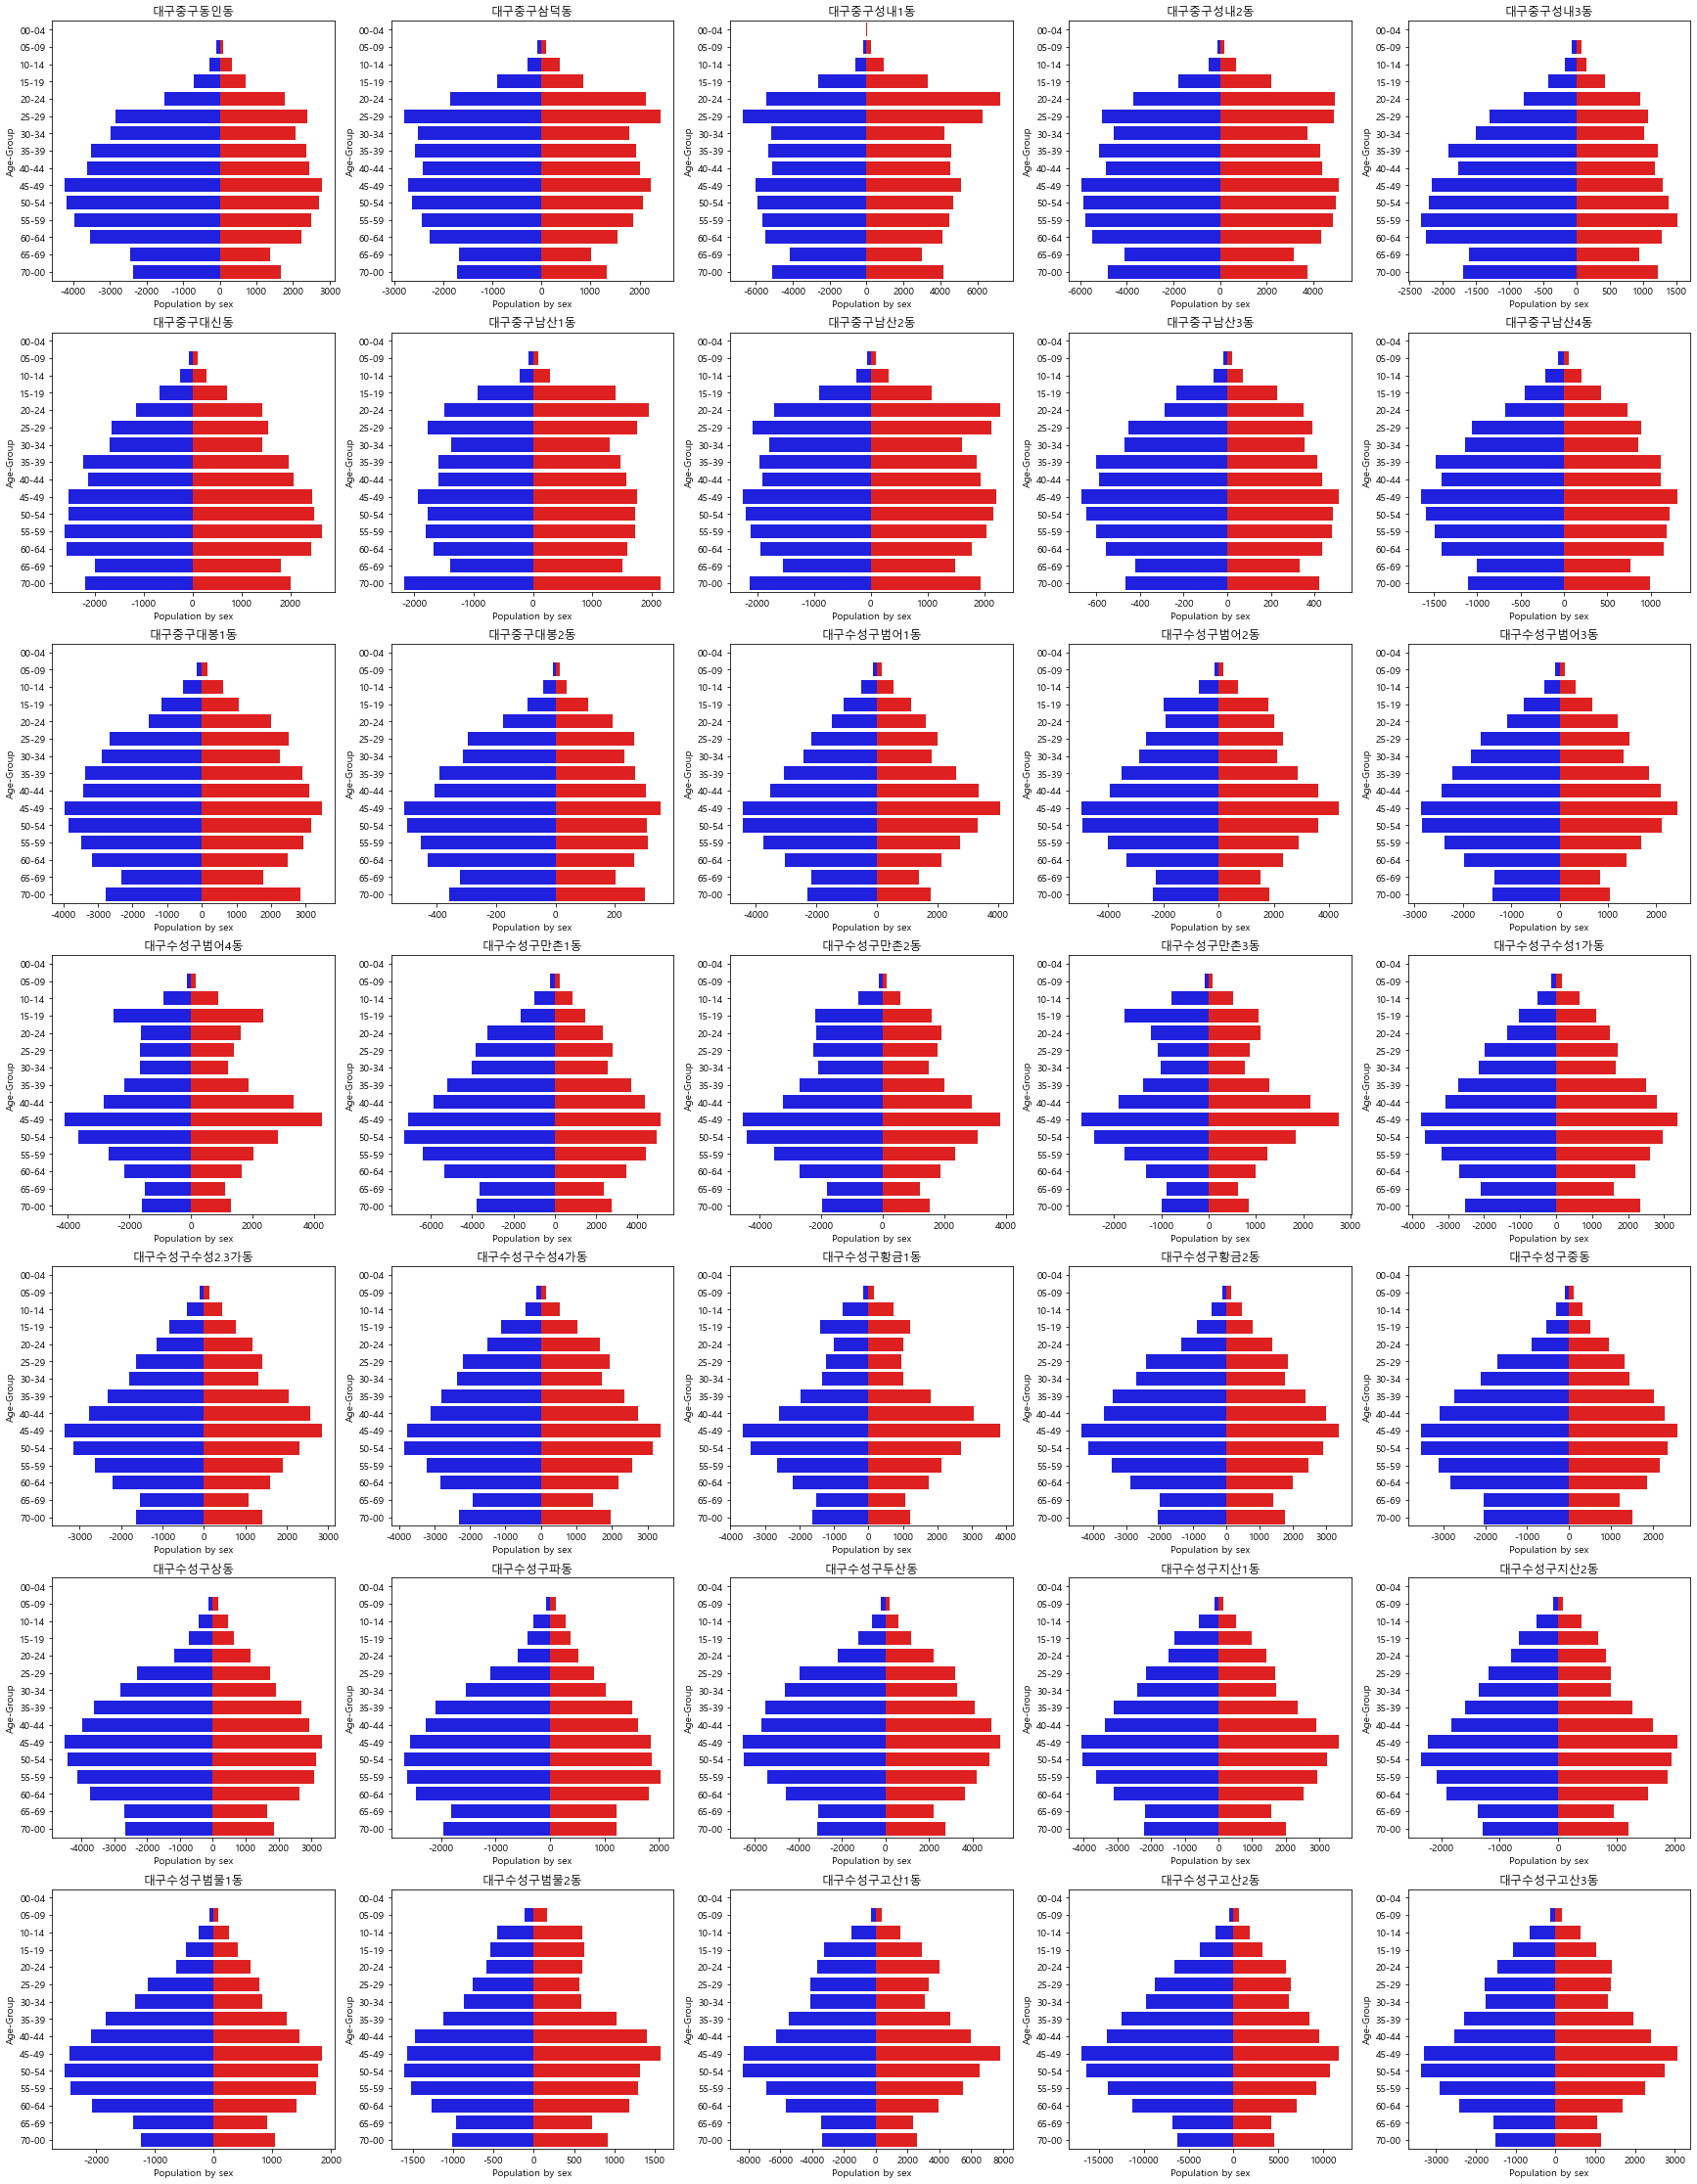

In [19]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize = (30, 40))
name_list = daegu_df['TOTAL_NM'].unique()

for i, ax in zip(range(35),axes.flatten()):
    
    name = name_list[i]

    daegu_male = -1* (daegu_df.query("(SEX == 'M') and (TOTAL_NM == @name)")[age_col_list].iloc[0])
    daegu_female = daegu_df.query("(SEX == 'F') and (TOTAL_NM == @name)")[age_col_list].iloc[0]
    labels = ['male', 'female']
    daegu_popl = pd.DataFrame({'age': age_col_list,
                            'male' : daegu_male,
                            'female' : daegu_female})
    
    daegu_dong_plot = sns.barplot(x="male", y="age", data=daegu_popl, orient='h', color = 'b', lw=0, ax=ax)
    daegu_dong_plot = sns.barplot(x="female", y="age", data=daegu_popl, orient='h', color = 'r', lw=0, ax=ax)
    daegu_dong_plot.set(xlabel="Population by sex", ylabel="Age-Group", title=name)
    
plt.show()    

### 서울 동에 대한 그래프

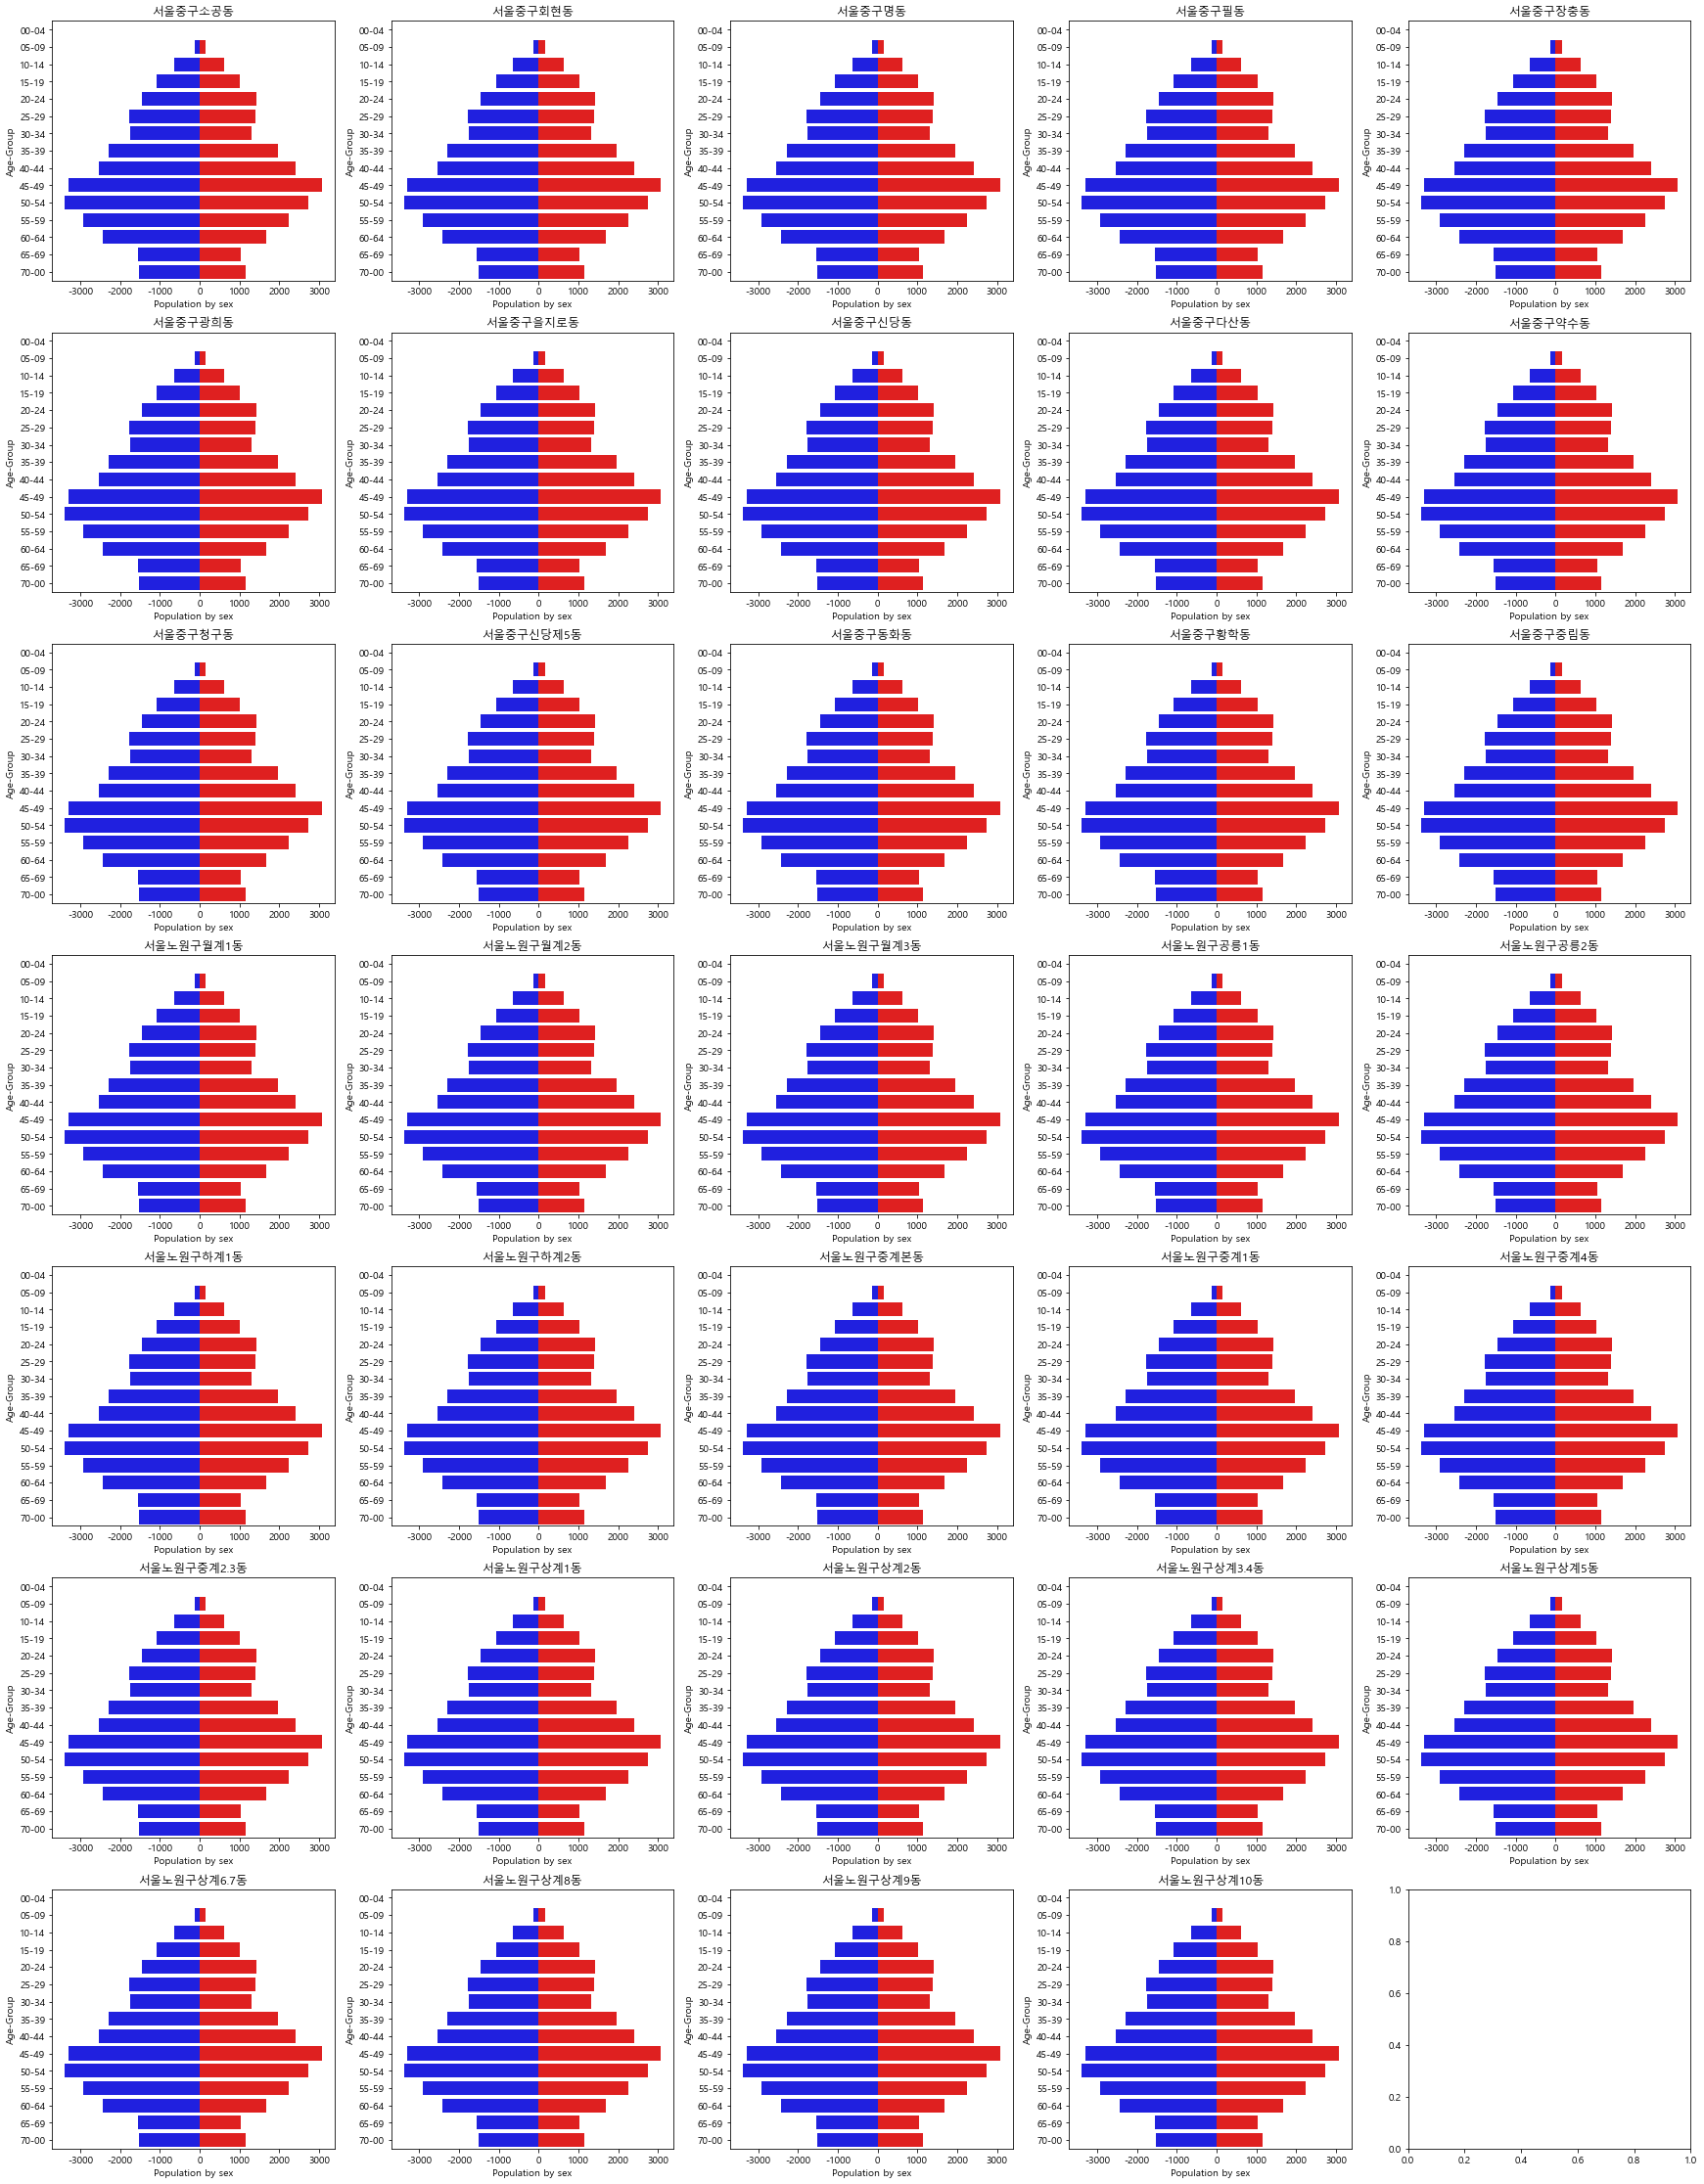

In [20]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize = (30, 40))
name_list = seoul_df['TOTAL_NM'].unique()

for i, ax in zip(range(34),axes.flatten()):
    
    name = name_list[i]

    seoul_male = -1* (seoul_df.query("(SEX == 'M') and (TOTAL_NM == @name)")[age_col_list].iloc[0])
    seoul_female = seoul_df.query("(SEX == 'F') and (TOTAL_NM == @name)")[age_col_list].iloc[0]
    labels = ['male', 'female']
    seoul_popl = pd.DataFrame({'age': age_col_list,
                            'male' : daegu_male,
                            'female' : daegu_female})
    
    seoul_dong_plot = sns.barplot(x="male", y="age", data=seoul_popl, orient='h', color = 'b', lw=0, ax=ax)
    seoul_dong_plot = sns.barplot(x="female", y="age", data=seoul_popl, orient='h', color = 'r', lw=0, ax=ax)
    seoul_dong_plot.set(xlabel="Population by sex", ylabel="Age-Group", title=name)
    
plt.show()    

## 2019년, 2020년 매출액(전체)

In [21]:
# 전처리 datetime의 뒤에 HMS 떼기
sh_resident['DATE'] = [i.date() for i in sh_resident['DATE']]
sh_resident['DATE'] = sh_resident['DATE'].astype(str)

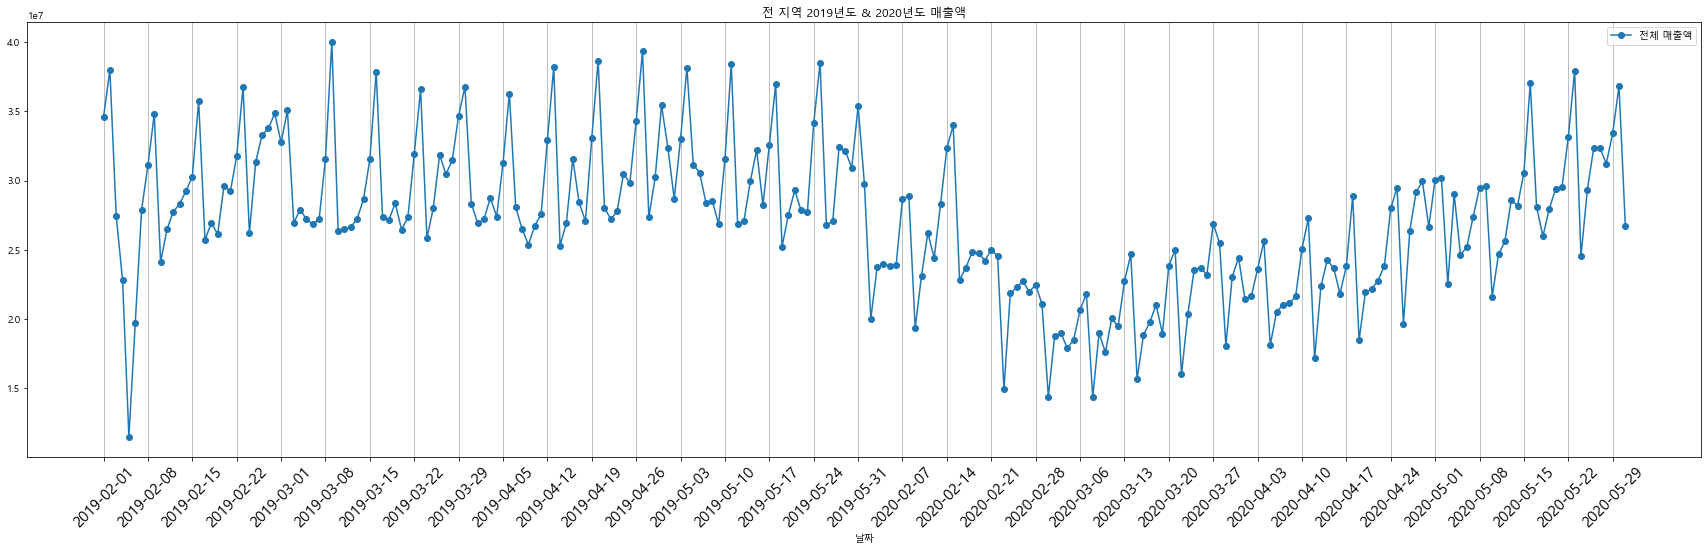

In [22]:
date_amt = pd.DataFrame(sh_resident.groupby('DATE')[['USE_AMT']].sum().to_records())
# date_amt['DATE'] = [i.date() for i in date_amt['DATE']]

label = sorted(date_amt['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(date_amt['USE_AMT'], linestyle='-', marker='o', label="전체 매출액")
plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('전 지역 2019년도 & 2020년도 매출액')
plt.grid(axis='x')
plt.show()

## 2019년, 2020년 매출액(by 시)

### 전체 지역 2019년도 2020년도 매출액(서울/대구 비교)

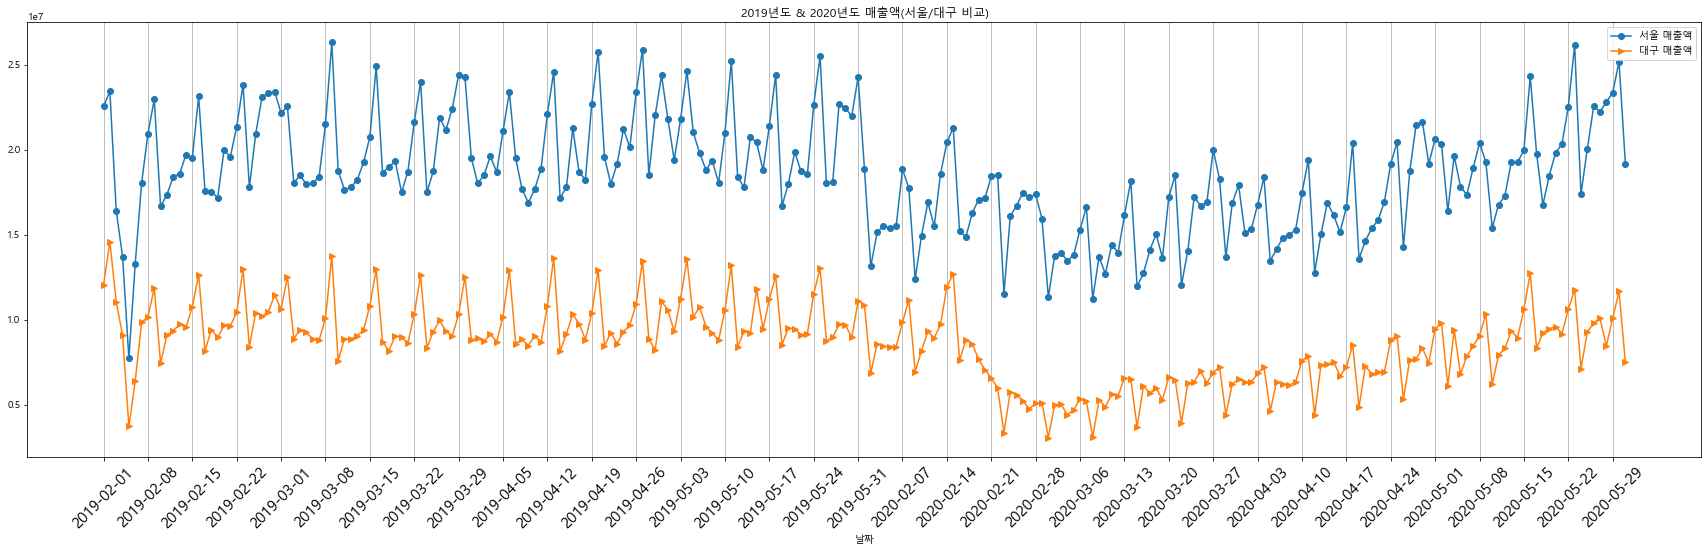

In [20]:
# 서울 / 대구 DataFrame 만들기
seoul_df = sh_resident.loc[sh_resident['SI_CODE']== '11']
daegu_df = sh_resident.loc[sh_resident['SI_CODE']== '27']

seoul_df = pd.DataFrame(seoul_df.groupby('DATE')[['USE_AMT']].sum().to_records())
daegu_df = pd.DataFrame(daegu_df.groupby('DATE')[['USE_AMT']].sum().to_records())

label = sorted(sh_resident['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(seoul_df['USE_AMT'], linestyle='-', marker='o', label="서울 매출액")
plt.plot(daegu_df['USE_AMT'], linestyle='-', marker='>', label="대구 매출액")

plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('2019년도 & 2020년도 매출액(서울/대구 비교)')
plt.grid(axis='x')
plt.show()

### 서울 2019년도 2020년도 매출액

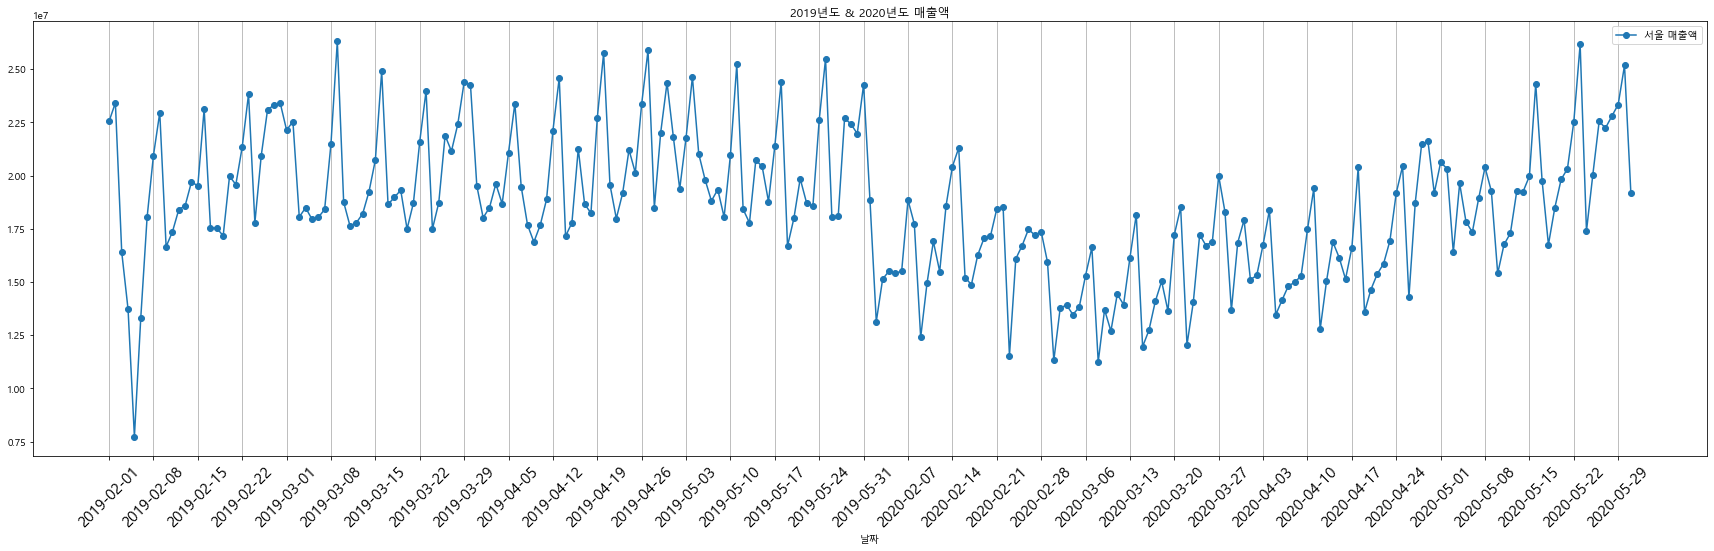

In [21]:
seoul_df = sh_resident.loc[sh_resident['SI_CODE']== '11']

seoul_df = pd.DataFrame(seoul_df.groupby('DATE')[['USE_AMT']].sum().to_records())

label = sorted(seoul_df['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(seoul_df['USE_AMT'], linestyle='-', marker='o', label="서울 매출액")
plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('2019년도 & 2020년도 매출액')
plt.grid(axis='x')
plt.show()

### 대구 2019년도 2020년도 매출액

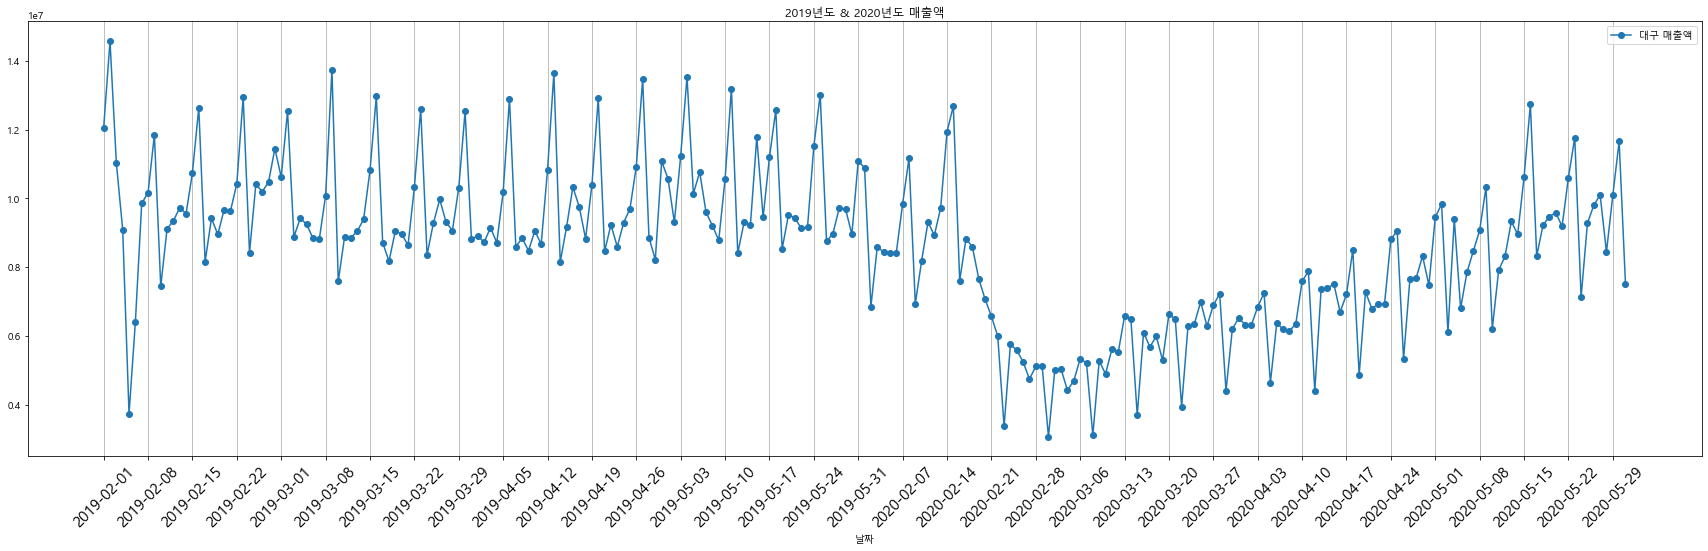

In [22]:
daegu_df = sh_resident.loc[sh_resident['SI_CODE']== '27']

daegu_df = pd.DataFrame(daegu_df.groupby('DATE')[['USE_AMT']].sum().to_records())

label = sorted(daegu_df['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(daegu_df['USE_AMT'], linestyle='-', marker='o', label="대구 매출액")
plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('2019년도 & 2020년도 매출액')
plt.grid(axis='x')
plt.show()

## 2019년, 2020년 매출액(by 구)

### 서울/대구 지역 2019년도 2020년도 매출액(중구, 노원구, 중구, 수성구)

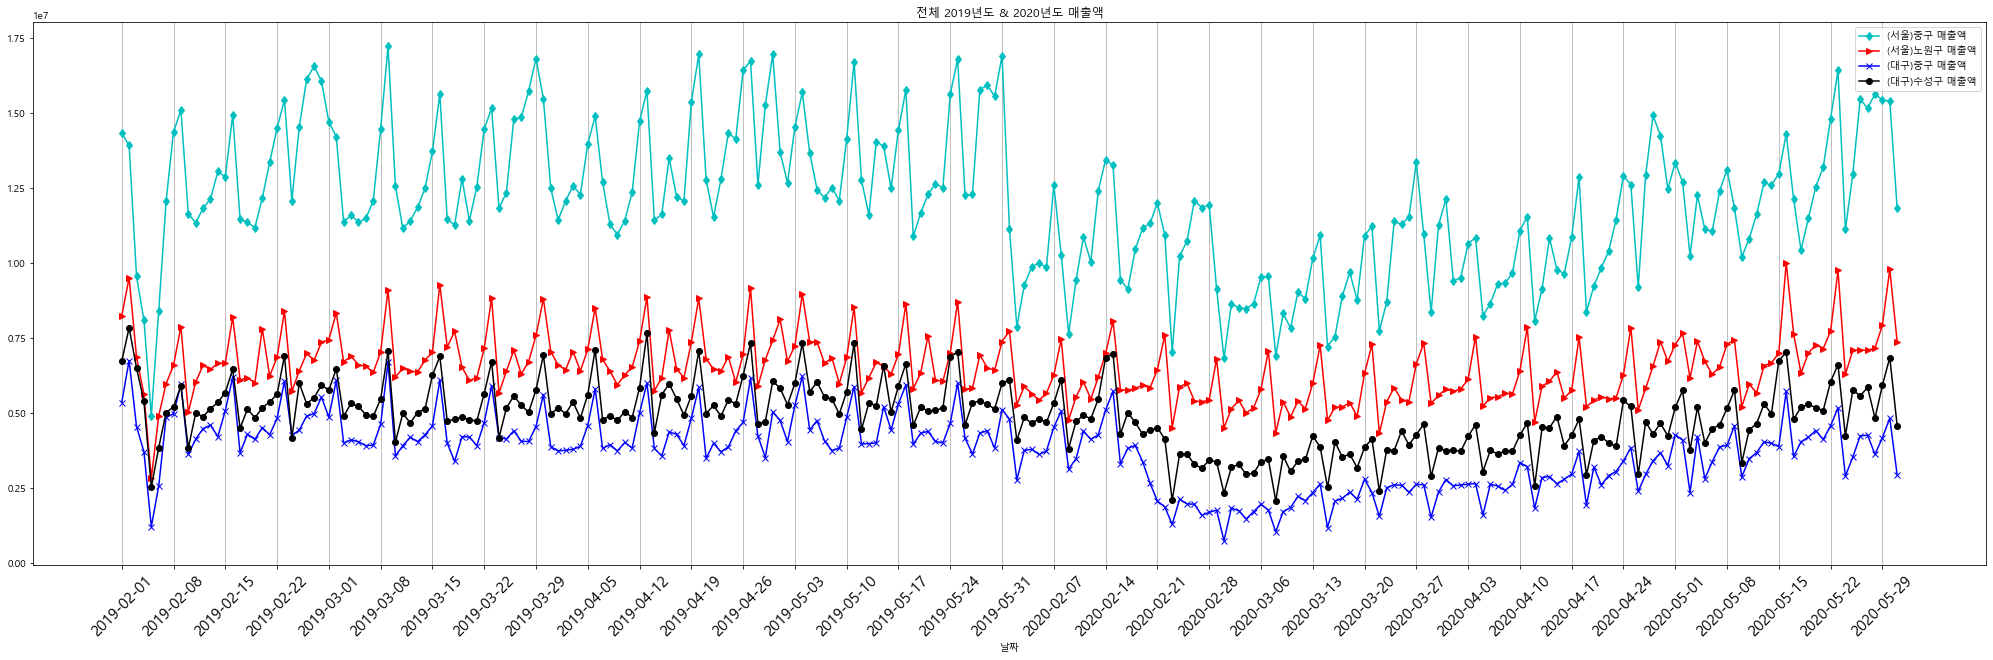

In [23]:
seoul_df = sh_resident.loc[sh_resident['SI_CODE']== '11']
daegu_df = sh_resident.loc[sh_resident['SI_CODE']== '27']

seoul_df = pd.DataFrame(seoul_df.groupby(['DATE', 'GU_CODE'])[['USE_AMT']].sum().to_records())
daegu_df = pd.DataFrame(daegu_df.groupby(['DATE', 'GU_CODE'])[['USE_AMT']].sum().to_records())

label = sorted(sh_resident['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (35, 10))

seoul_junggu = seoul_df.loc[seoul_df['GU_CODE']=='14']['USE_AMT']
seoul_nowongu = seoul_df.loc[seoul_df['GU_CODE']=='35']['USE_AMT']

daegu_junggu = daegu_df.loc[daegu_df['GU_CODE']=='11']['USE_AMT']
daegu_suseonggu = daegu_df.loc[daegu_df['GU_CODE']=='26']['USE_AMT']

plt.plot(index, seoul_junggu, 'dc-',  label="(서울)중구 매출액")
plt.plot(index, seoul_nowongu, '>r-', label="(서울)노원구 매출액")
plt.plot(index, daegu_junggu, 'xb-', label="(대구)중구 매출액")
plt.plot(index, daegu_suseonggu, 'ok-', label="(대구)수성구 매출액")

plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('전체 2019년도 & 2020년도 매출액')
plt.grid(axis='x')
    
plt.show()    

### 서울 지역 2019년도 2020년도 매출액(중구, 노원구)

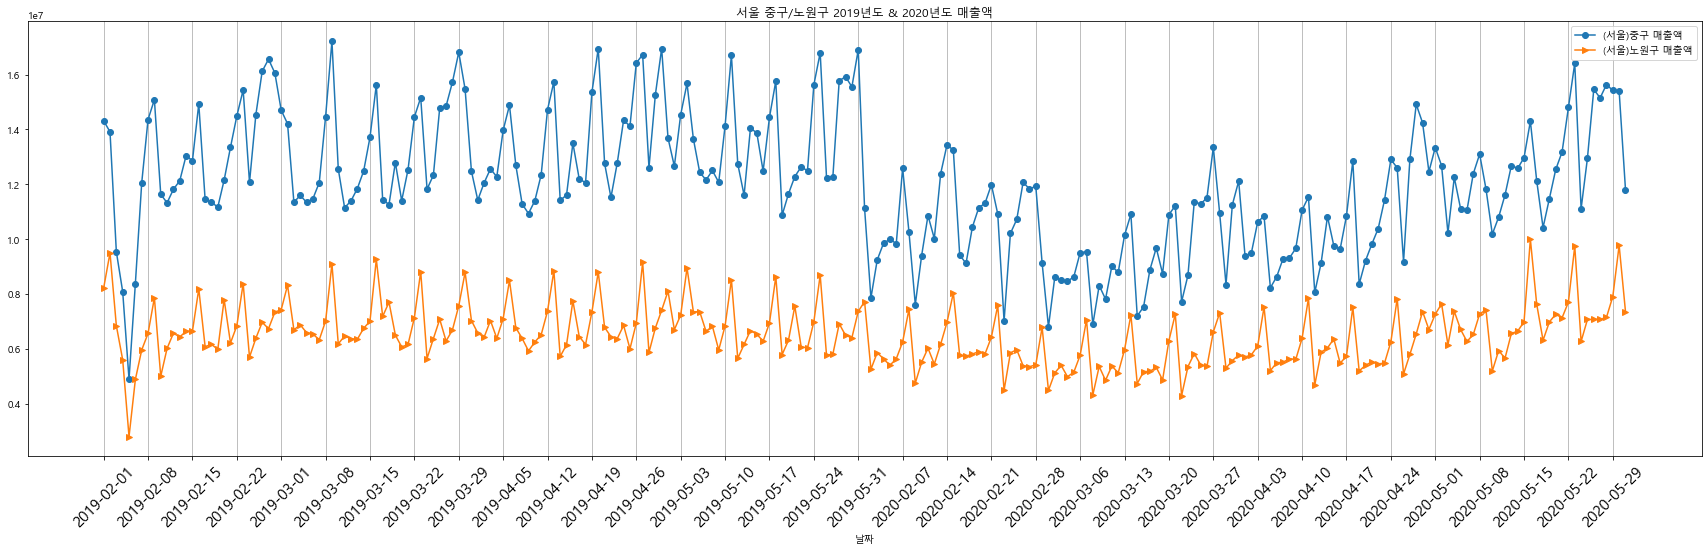

In [24]:
seoul_df = sh_resident.loc[sh_resident['SI_CODE']== '11']

seoul_df = pd.DataFrame(seoul_df.groupby(['DATE', 'GU_CODE'])[['USE_AMT']].sum().to_records())

label = sorted(seoul_df['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

seoul_junggu = seoul_df.loc[seoul_df['GU_CODE']=='14']['USE_AMT']
seoul_nowongu = seoul_df.loc[seoul_df['GU_CODE']=='35']['USE_AMT']

plt.plot(index, seoul_junggu, linestyle='-', marker='o', label="(서울)중구 매출액")
plt.plot(index, seoul_nowongu, linestyle='-', marker='>', label="(서울)노원구 매출액")

plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('서울 중구/노원구 2019년도 & 2020년도 매출액')
plt.grid(axis='x')
    
plt.show()    

### 대구 지역 2019년도 2020년도 매출액(중구, 수성구)

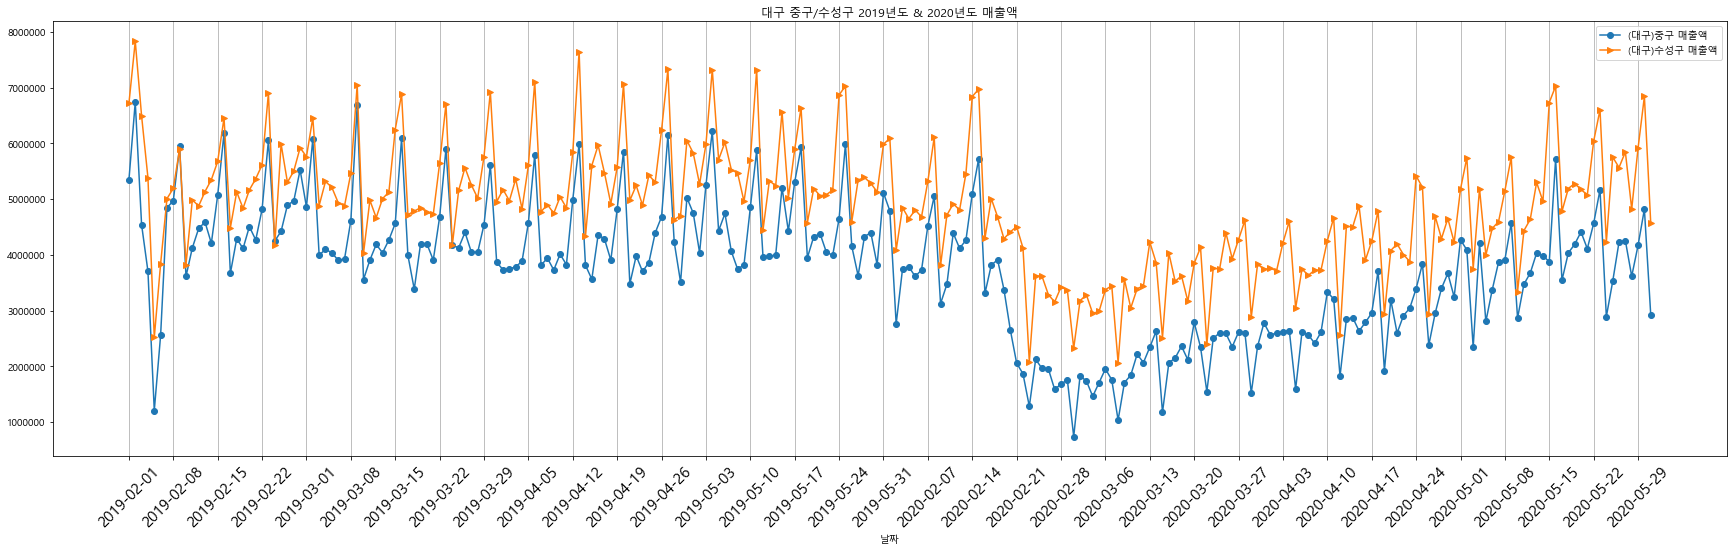

In [25]:
daegu_df = sh_resident.loc[sh_resident['SI_CODE']== '27']

daegu_df = pd.DataFrame(daegu_df.groupby(['DATE', 'GU_CODE'])[['USE_AMT']].sum().to_records())

label = sorted(daegu_df['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

daegu_junggu = daegu_df.loc[daegu_df['GU_CODE']=='11']['USE_AMT']
daegu_suseonggu = daegu_df.loc[daegu_df['GU_CODE']=='26']['USE_AMT']

plt.plot(index, daegu_junggu, linestyle='-', marker='o', label="(대구)중구 매출액")
plt.plot(index, daegu_suseonggu, linestyle='-', marker='>', label="(대구)수성구 매출액")
plt.xlabel('날짜')
plt.xticks(index[::7], label[::7], rotation='45', fontsize=15)
plt.legend()
plt.title('대구 중구/수성구 2019년도 & 2020년도 매출액')
plt.grid(axis='x')
    
plt.show()    

## 2019년, 2020년 매출액(by 동)

In [26]:
# 서울 DataFrame로, 대구 DataFrame로 나누기
temp_df = sh_resident.copy()
temp_df['TOTAL_CODE'] = temp_df['TOTAL_CODE'].astype(str)
daegu_df = temp_df[temp_df['TOTAL_CODE'].str.startswith('27')]
seoul_df = temp_df[temp_df['TOTAL_CODE'].str.startswith('11')]

In [30]:
# total_code 딕셔너리를 DataFrame로 변환
total_df = pd.DataFrame(sh_data['GEO_CODE_DICT']['DICT_TOTAL'].items(), columns=['TOTAL_CODE', 'TOTAL_NM'])
# total_df.head()

In [31]:
# 대구 DataFrame와 total_code DataFrame 병합
daegu_df = pd.DataFrame(daegu_df.groupby(['DATE', 'TOTAL_CODE'])[['USE_AMT']].sum().to_records())
daegu_df = pd.merge(daegu_df, total_df, on="TOTAL_CODE")
# daegu_df.head()

### 대구 매출액

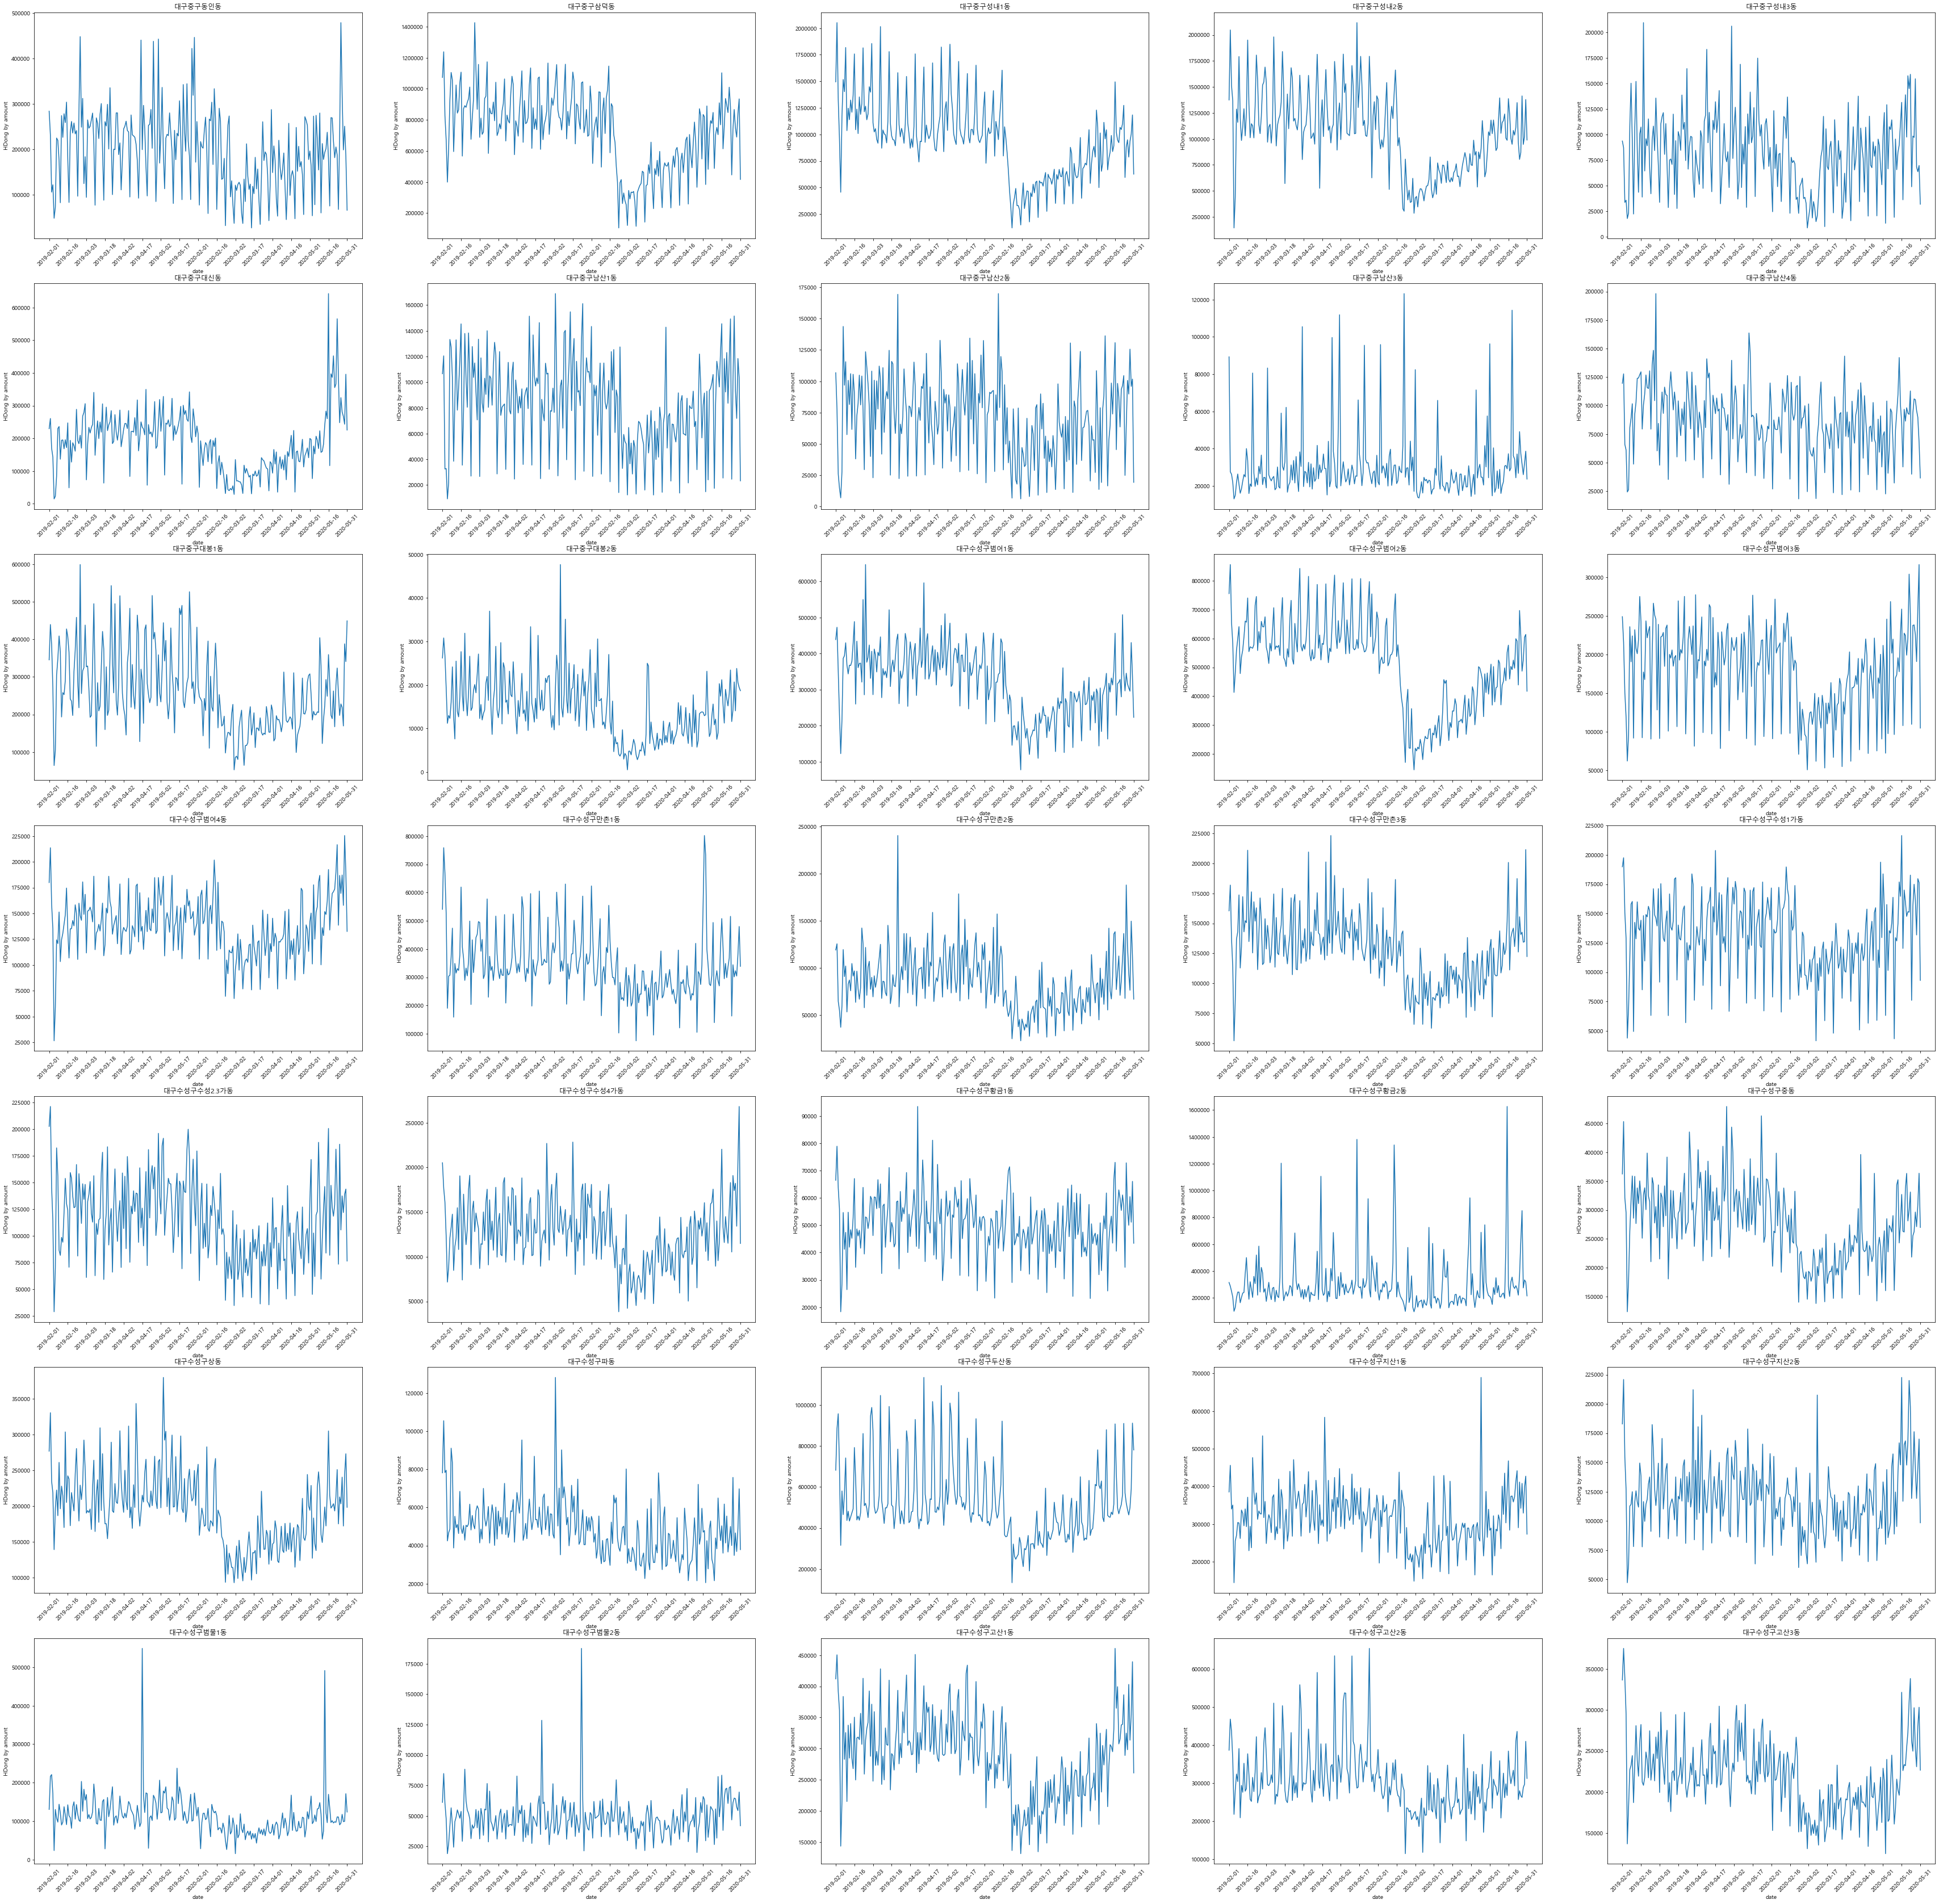

In [29]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize = (60, 60))
name_list = daegu_df['TOTAL_NM'].unique()

label = sorted(daegu_df['DATE'].unique())
index = np.arange(len(label))

for i, ax in zip(range(35),axes.flatten()):
    
    name = name_list[i]
    
    daegu_dong_amt = daegu_df.query("TOTAL_NM == @name")['USE_AMT']
    daegu_amt_df = pd.DataFrame({'date': label,
                                 'amt' : daegu_dong_amt})

    daegu_amt = sns.lineplot(x='date',y='amt', data=daegu_amt_df, ax=ax)
    daegu_amt.set( ylabel="HDong by amount", title=name)
    daegu_amt.set_xticks(daegu_amt_df['date'][::15])
    daegu_amt.set_xticklabels(labels = daegu_amt_df['date'][::15], rotation='45')
    
plt.show()    

### 서울 매출액

In [32]:
# 서울 DataFrame와 total_code DataFrame 병합
seoul_df = pd.DataFrame(seoul_df.groupby(['DATE', 'TOTAL_CODE'])[['USE_AMT']].sum().to_records())
seoul_df = pd.merge(seoul_df, total_df, on="TOTAL_CODE")
# seoul_df.head()

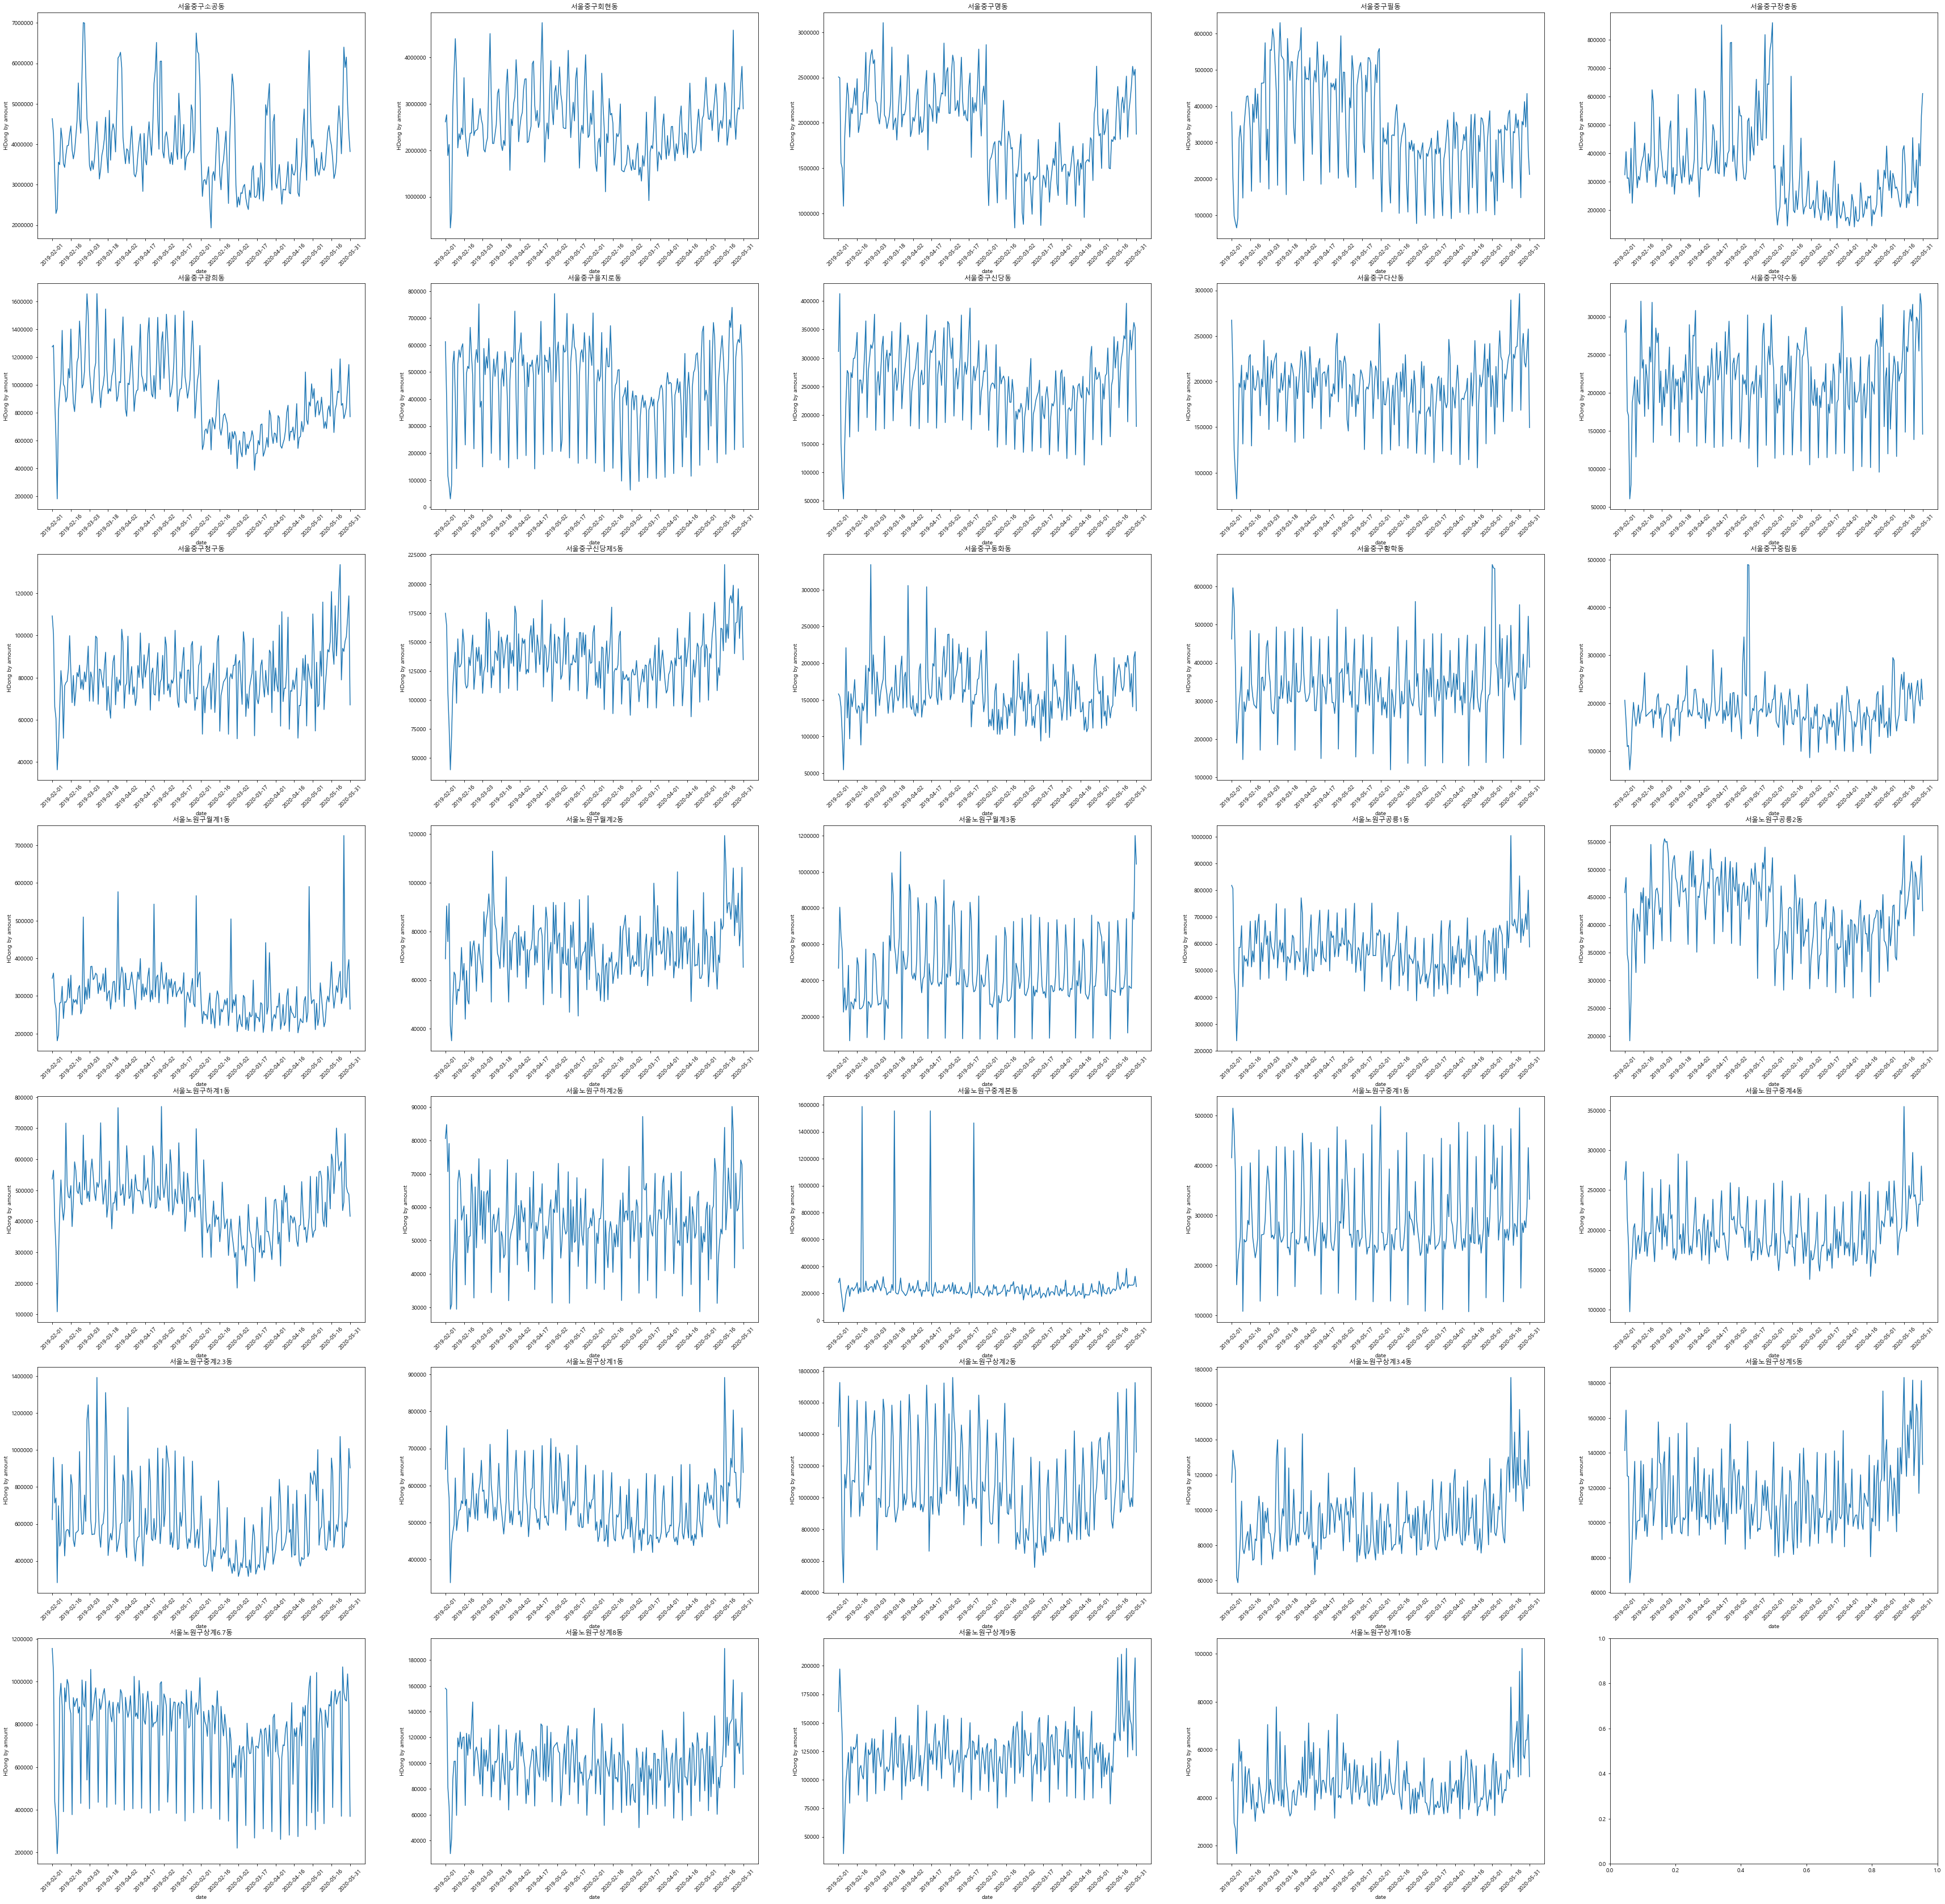

In [33]:
fig, axes = plt.subplots(ncols=5, nrows=7, figsize = (60, 60))
name_list = seoul_df['TOTAL_NM'].unique()

label = sorted(seoul_df['DATE'].unique())
index = np.arange(len(label))

for i, ax in zip(range(34),axes.flatten()):
    
    name = name_list[i]
    
    seoul_dong_amt = seoul_df.query("TOTAL_NM == @name")['USE_AMT']
    seoul_amt_df = pd.DataFrame({'date': label,
                                 'amt' : seoul_dong_amt})

    seoul_amt = sns.lineplot(x='date',y='amt', data=seoul_amt_df, ax=ax)
    seoul_amt.set(ylabel="HDong by amount", title=name)
    seoul_amt.set_xticks(seoul_amt_df['date'][::15])
    seoul_amt.set_xticklabels(labels = seoul_amt_df['date'][::15], rotation='45')
    
plt.show()    

## 코로나 데이터
## 보건복지부 코로나 데이터 활용

In [35]:
# 'SI_NM'에서 '서울','대구'가 있음 추가로 '검역'도 있음
# 3월 2일, 3일 데이터가 없음
covid.head()

DATE    YEAR  MONTH   DAY SI_NM  DEC_CNT  INC_DEC  DEATH_CNT  \
0 2020-03-01  2020.0    7.0  31.0    검역   1186.0     12.0        0.0   
1 2020-03-01  2020.0    7.0  31.0    제주     26.0      0.0        0.0   
2 2020-03-01  2020.0    7.0  31.0    경남    159.0      0.0        0.0   
3 2020-03-01  2020.0    7.0  31.0    경북   1401.0      2.0       54.0   
4 2020-03-01  2020.0    7.0  31.0    전남     38.0      0.0        0.0   

   ISOL_ING_CNT  ISOL_CLEAR_CNT  OVER_FLOW_CNT  LOCAL_OCC_CNT  QUR_RATE  
0         300.0           886.0           12.0            0.0       NaN  
1           5.0            21.0            0.0            0.0      3.88  
2          10.0           149.0            0.0            0.0      4.73  
3           8.0          1339.0            2.0            0.0     52.62  
4          14.0            24.0            0.0            0.0      2.04

In [36]:
# 데이터 전처리
# 년/월/일 데이터에 소수점을 제거하고 문자형으로 변환
# DATE 컬럼을 생성

covid['YEAR'] = covid['YEAR'].astype(int).astype(str)
covid['MONTH'] = covid['MONTH'].astype(int).astype(str)
covid['DAY'] = covid['DAY'].astype(int).astype(str)
covid['DATE'] = covid['YEAR']+'-'+covid['MONTH']+'-'+covid['DAY']
covid['DATE'] = pd.to_datetime(covid['DATE'])

covid['DATE'] = [i.date() for i in covid['DATE']]
covid['DATE'] = covid['DATE'].astype(str)

In [38]:
seoul_covid = covid.loc[covid['SI_NM']=='서울']
daegu_covid = covid.loc[covid['SI_NM']=='대구']
# seoul_covid.head()
# daegu_covid.head()

## 일일확진자 수(전일대비 증감 수)

### 서울지역 코로나 일일 확진자 수(전일대비 증감 수)

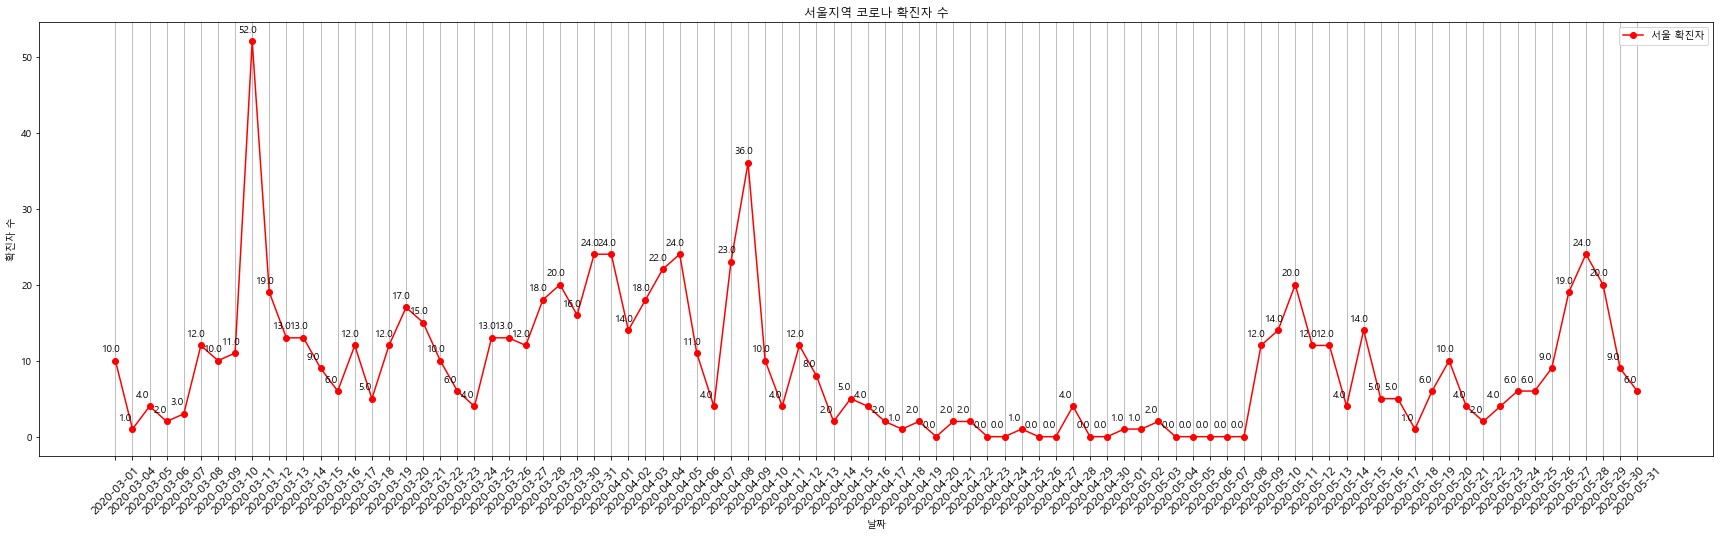

In [39]:
seoul_covid_cnt = pd.DataFrame(seoul_covid.groupby('DATE')[['INC_DEC']].sum().to_records())
# seoul_covid_cnt

# 2020-05-31일 이후 데이터 날리기
seoul_covid_cnt = seoul_covid_cnt.drop(seoul_covid_cnt.index[-60:])

label = sorted(seoul_covid_cnt['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(seoul_covid_cnt['INC_DEC'], linestyle='-', marker='o', color='r', label="서울 확진자")
for a,b in zip(index, seoul_covid_cnt['INC_DEC']): 
    plt.text(a-0.8, b+1.2, str(b))

plt.xlabel('날짜')
plt.ylabel('확진자 수')
plt.xticks(index, label, rotation='45', fontsize=12)
plt.legend()
plt.title('서울지역 코로나 확진자 수')
plt.grid(axis='x')
plt.show()

### 대구지역 코로나 일일 확진자 수(전일대비 증감 수)

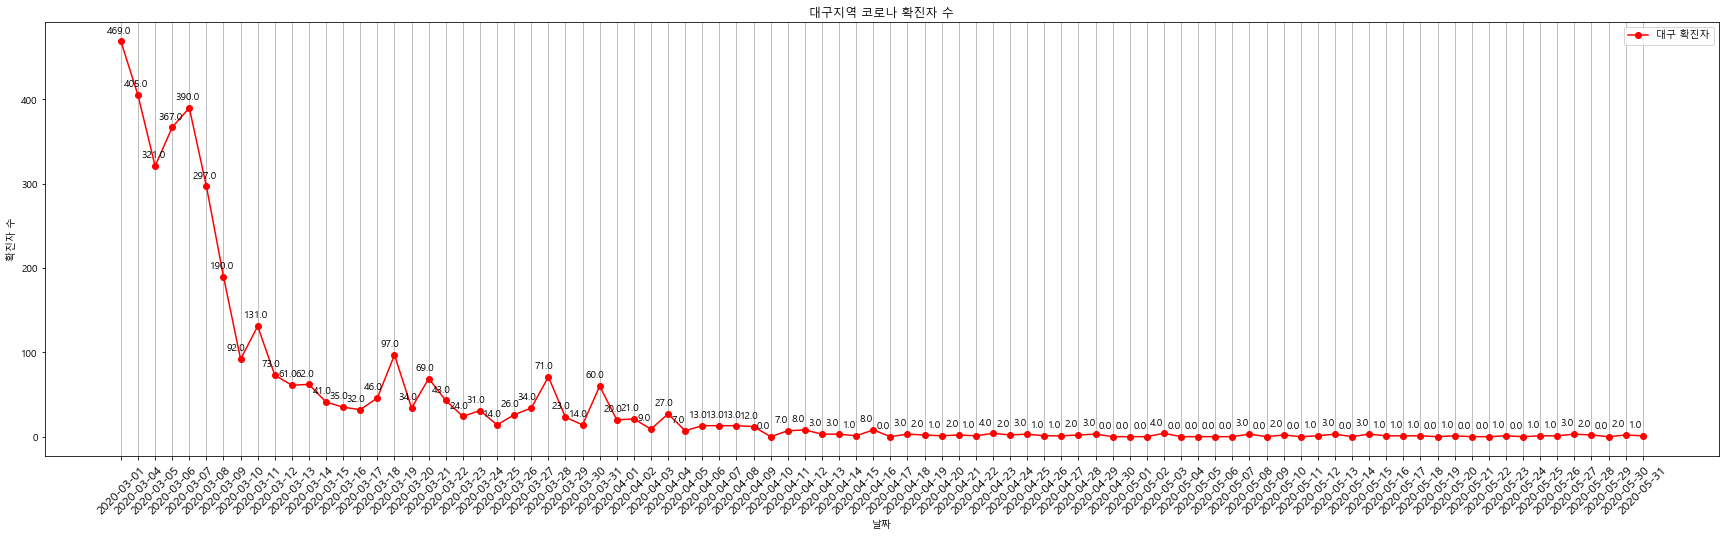

In [40]:
daegu_covid_cnt = pd.DataFrame(daegu_covid.groupby('DATE')[['INC_DEC']].sum().to_records())
# daegu_covid_cnt

# 2020-05-31일 이후 데이터 날리기
daegu_covid_cnt = daegu_covid_cnt.drop(daegu_covid_cnt.index[-60:])

label = sorted(daegu_covid_cnt['DATE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (30, 8))

plt.plot(daegu_covid_cnt['INC_DEC'], linestyle='-', marker='o', color='r', label="대구 확진자")
for a,b in zip(index, daegu_covid_cnt['INC_DEC']): 
    plt.text(a-0.8, b+10, str(b))

plt.xlabel('날짜')
plt.ylabel('확진자 수')
plt.xticks(index, label, rotation='45', fontsize=12)
plt.legend()
plt.title('대구지역 코로나 확진자 수')
plt.grid(axis='x')
plt.show()